In [1]:
import os
import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
os.chdir('../..')

In [3]:
BATCH_SIZE = 32

In [4]:
SAVE_STEPS_SCHEDULE = [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 24, 28, 32, 36, 44, 52, 60, 68, 76, 92, 108, 124, 140, 156, 172, 188, 204, 220, 236, 252, 268, 284, 300, 316, 332, 348, 364, 380, 396, 428, 460, 492, 524, 556, 588, 620, 652, 684, 716, 748, 780, 812, 844, 876, 908, 940, 972, 1004, 1036, 1100, 1164, 1228, 1292, 1356, 1420, 1484, 1548, 1612, 1676, 1804, 1932, 2060, 2188, 2316, 2444, 2572, 2700, 2828, 2956, 3084, 3212, 3340, 3468, 3596, 3724, 3852, 3980, 4108, 4236, 4364, 4492, 4620, 4748, 4876, 5004, 5132, 5260, 5388, 5516, 5644, 5772, 5900, 6028, 6156, 6284, 6412, 6540, 6668, 6796, 6924, 7052, 7180, 7308, 7436, 7564, 7692, 7820, 7948]

### SQuADv1

In [5]:
SEEDS = [28, 29, 30]

squadv1_df = pd.DataFrame()

for seed, checkpoint in tqdm(
    list(itertools.product(SEEDS, SAVE_STEPS_SCHEDULE))
):
    
    df = pd.read_json(
        f'predictions/albert-xlarge-v2-squadv1-wu=100-lr=3e5-bs=32-msl=384-seed={seed}/checkpoint-{checkpoint}/eval_results.json',
        orient='index'
    ).T

    df['seed'] = seed
    df['checkpoint'] = checkpoint

    squadv1_df = squadv1_df.append(df, ignore_index=True)

100%|██████████| 360/360 [00:11<00:00, 31.38it/s]


In [6]:
squadv1_df.head()

,eval_exact_match,eval_f1,eval_samples,seed,checkpoint
0,0.094607,4.923171,10808.0,28,1
1,0.104068,5.037814,10808.0,28,2
2,0.132450,5.204460,10808.0,28,3
3,0.132450,5.195848,10808.0,28,4
4,0.132450,5.204460,10808.0,28,5


In [7]:
squadv1_df.rename(columns={'eval_f1': 'F1'}, inplace=True)

In [8]:
squadv1_df['model'] = 'SQuADv1'

In [9]:
squadv1_df.head()

,eval_exact_match,F1,eval_samples,seed,checkpoint,model
0,0.094607,4.923171,10808.0,28,1,SQuADv1
1,0.104068,5.037814,10808.0,28,2,SQuADv1
2,0.132450,5.204460,10808.0,28,3,SQuADv1
3,0.132450,5.195848,10808.0,28,4,SQuADv1
4,0.132450,5.204460,10808.0,28,5,SQuADv1


### SQuADv2

In [10]:
SEEDS = [27, 29, 30]

squadv2_df = pd.DataFrame()

for seed, checkpoint in tqdm(
    list(itertools.product(SEEDS, SAVE_STEPS_SCHEDULE))
):
    
    df = pd.read_json(
        f'predictions/albert-xlarge-v2-squadv2-wu=100-lr=3e5-bs=32-msl=384-seed={seed}/checkpoint-{checkpoint}/eval_results.json',
        orient='index'
    ).T

    df['seed'] = seed
    df['checkpoint'] = checkpoint

    squadv2_df = squadv2_df.append(df, ignore_index=True)

100%|██████████| 360/360 [00:14<00:00, 24.97it/s]


In [11]:
squadv2_df.head()

,eval_HasAns_exact,eval_HasAns_f1,eval_HasAns_total,eval_NoAns_exact,eval_NoAns_f1,eval_NoAns_total,eval_best_exact,eval_best_exact_thresh,eval_best_f1,eval_best_f1_thresh,eval_exact,eval_f1,eval_samples,eval_total,seed,checkpoint
0,0.067476,5.692667,5928.0,0.084104,0.084104,5945.0,50.071591,0.0,50.072527,0.0,0.075802,2.884370,12171.0,11873.0,27,1
1,0.067476,5.692667,5928.0,0.084104,0.084104,5945.0,50.071591,0.0,50.072527,0.0,0.075802,2.884370,12171.0,11873.0,27,2
2,0.067476,5.692667,5928.0,0.084104,0.084104,5945.0,50.071591,0.0,50.072527,0.0,0.075802,2.884370,12171.0,11873.0,27,3
3,0.067476,5.735121,5928.0,0.084104,0.084104,5945.0,50.071591,0.0,50.072527,0.0,0.075802,2.905567,12171.0,11873.0,27,4
4,0.067476,5.790027,5928.0,0.100925,0.100925,5945.0,50.071591,0.0,50.072527,0.0,0.084225,2.941403,12171.0,11873.0,27,5


In [12]:
squadv2_df.rename(columns={'eval_f1': 'F1'}, inplace=True)

In [13]:
squadv2_df['model'] = 'SQuADv2'

In [14]:
squadv2_df.head()

,eval_HasAns_exact,eval_HasAns_f1,eval_HasAns_total,eval_NoAns_exact,eval_NoAns_f1,eval_NoAns_total,eval_best_exact,eval_best_exact_thresh,eval_best_f1,eval_best_f1_thresh,eval_exact,F1,eval_samples,eval_total,seed,checkpoint,model
0,0.067476,5.692667,5928.0,0.084104,0.084104,5945.0,50.071591,0.0,50.072527,0.0,0.075802,2.884370,12171.0,11873.0,27,1,SQuADv2
1,0.067476,5.692667,5928.0,0.084104,0.084104,5945.0,50.071591,0.0,50.072527,0.0,0.075802,2.884370,12171.0,11873.0,27,2,SQuADv2
2,0.067476,5.692667,5928.0,0.084104,0.084104,5945.0,50.071591,0.0,50.072527,0.0,0.075802,2.884370,12171.0,11873.0,27,3,SQuADv2
3,0.067476,5.735121,5928.0,0.084104,0.084104,5945.0,50.071591,0.0,50.072527,0.0,0.075802,2.905567,12171.0,11873.0,27,4,SQuADv2
4,0.067476,5.790027,5928.0,0.100925,0.100925,5945.0,50.071591,0.0,50.072527,0.0,0.084225,2.941403,12171.0,11873.0,27,5,SQuADv2


### SQuADv1-AdversarialQA

In [15]:
SEEDS = [27, 28, 29]
DATASETS = ['squad', 'dbert', 'dbidaf', 'droberta']

squadv1_adqa_df = pd.DataFrame()

for seed, checkpoint, dataset in tqdm(
    list(itertools.product(SEEDS, SAVE_STEPS_SCHEDULE, DATASETS))
):
    
    df = pd.read_json(
        f'predictions/albert-xlarge-v2-squadv1-adversarialall-wu=100-lr=3e5-bs=32-msl=384-seed={seed}-{dataset}/checkpoint-{checkpoint}/eval_results.json',
        orient='index'
    ).T

    df['seed'] = seed
    df['checkpoint'] = checkpoint
    df['dataset'] = dataset

    squadv1_adqa_df = squadv1_adqa_df.append(df, ignore_index=True)

100%|██████████| 1440/1440 [00:55<00:00, 25.77it/s]


In [16]:
squadv1_adqa_df.head()

,eval_exact_match,eval_f1,eval_samples,seed,checkpoint,dataset
0,0.075686,5.343627,10808.0,27,1,squad
1,0.000000,4.773494,1009.0,27,1,dbert
2,0.000000,4.291367,1006.0,27,1,dbidaf
3,0.100000,4.463108,1003.0,27,1,droberta
4,0.075686,5.407113,10808.0,27,2,squad


In [17]:
squadv1_adqa_df.rename(columns={'eval_f1': 'F1'}, inplace=True)

In [18]:
squadv1_adqa_df['F1_sum'] = squadv1_adqa_df['F1'] * squadv1_adqa_df['eval_samples']

In [19]:
squadv1_adqa_df = squadv1_adqa_df[['checkpoint', 'seed', 'eval_samples', 'F1_sum']].groupby(['checkpoint', 'seed']).sum().reset_index()
squadv1_adqa_df.head()

,checkpoint,seed,eval_samples,F1_sum
0,1,27,13826.0,71363.990383
1,1,28,13826.0,63335.525433
2,1,29,13826.0,68153.727562
3,2,27,13826.0,72310.717345
4,2,28,13826.0,63335.525433


In [20]:
squadv1_adqa_df['F1'] = squadv1_adqa_df['F1_sum'] / squadv1_adqa_df['eval_samples']

In [21]:
squadv1_adqa_df.head()

,checkpoint,seed,eval_samples,F1_sum,F1
0,1,27,13826.0,71363.990383,5.161579
1,1,28,13826.0,63335.525433,4.580900
2,1,29,13826.0,68153.727562,4.929389
3,2,27,13826.0,72310.717345,5.230053
4,2,28,13826.0,63335.525433,4.580900


In [22]:
squadv1_adqa_df.shape

(360, 5)

In [23]:
squadv1_adqa_df['model'] = 'SQuADv1-AdQA'

In [24]:
squadv1_adqa_df.head()

,checkpoint,seed,eval_samples,F1_sum,F1,model
0,1,27,13826.0,71363.990383,5.161579,SQuADv1-AdQA
1,1,28,13826.0,63335.525433,4.580900,SQuADv1-AdQA
2,1,29,13826.0,68153.727562,4.929389,SQuADv1-AdQA
3,2,27,13826.0,72310.717345,5.230053,SQuADv1-AdQA
4,2,28,13826.0,63335.525433,4.580900,SQuADv1-AdQA


#### AdversarialQA

In [25]:
ADQA_CHKPTS = [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 24, 28, 32, 36, 44, 52, 60, 68, 76, 92, 108, 124, 140, 156, 172, 188, 204, 220, 236, 252, 268, 284, 300, 316, 332, 348, 364, 380, 396, 428, 460, 492, 524, 556, 588, 620, 652, 684, 716, 748, 780, 812, 844, 876, 908, 940, 972, 1004, 1036, 1100, 1164, 1228, 1292, 1356, 1420, 1484, 1548, 1612, 1676, 1804, 1932, 2060, 2188, 2316, 2444, 2572, 2700, 2828, 2956, 3084, 3212]

In [26]:
SEEDS = [28, 29, 30]

adqa_df = pd.DataFrame()

for seed, checkpoint in tqdm(
    list(itertools.product(SEEDS, ADQA_CHKPTS))
):
    
    df = pd.read_json(
        f'predictions/albert-xlarge-v2-adversarial_qa_all-wu=100-lr=3e5-bs=32-msl=384-seed={seed}-adversarialQA/checkpoint-{checkpoint}/eval_results.json',
        orient='index'
    ).T

    df['seed'] = seed
    df['checkpoint'] = checkpoint

    adqa_df = adqa_df.append(df, ignore_index=True)

100%|██████████| 249/249 [00:12<00:00, 19.68it/s]


In [27]:
adqa_df['f1_sum'] = adqa_df['eval_f1'] * adqa_df['eval_samples']

In [28]:
adqa_df.head()

,eval_exact_match,eval_f1,eval_samples,seed,checkpoint,f1_sum
0,0.066667,3.355815,3018.0,28,1,10127.849005
1,0.066667,3.355815,3018.0,28,2,10127.849005
2,0.066667,3.475582,3018.0,28,3,10489.305079
3,0.066667,3.542995,3018.0,28,4,10692.758997
4,0.066667,3.691747,3018.0,28,5,11141.691221


In [29]:
adqa_df = adqa_df.groupby(['checkpoint', 'seed']).sum().reset_index()
adqa_df['F1'] = adqa_df['f1_sum'] / adqa_df['eval_samples']

In [30]:
adqa_df.head()

,checkpoint,seed,eval_exact_match,eval_f1,eval_samples,f1_sum,F1
0,1,28,0.066667,3.355815,3018.0,10127.849005,3.355815
1,1,29,0.133333,3.867952,3018.0,11673.478759,3.867952
2,1,30,0.000000,3.304939,3018.0,9974.304439,3.304939
3,2,28,0.066667,3.355815,3018.0,10127.849005,3.355815
4,2,29,0.133333,3.996827,3018.0,12062.423633,3.996827


<AxesSubplot:xlabel='checkpoint', ylabel='F1'>

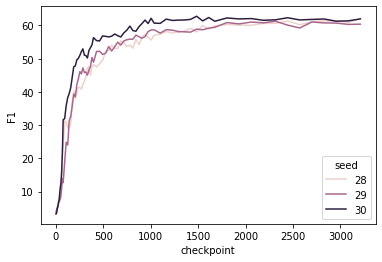

In [31]:
sns.lineplot(data=adqa_df, x='checkpoint', y='F1', hue='seed')

In [32]:
adqa_df = adqa_df[['checkpoint', 'seed', 'F1']]
adqa_df['model'] = 'AdQA'
adqa_df.head()

,checkpoint,seed,F1,model
0,1,28,3.355815,AdQA
1,1,29,3.867952,AdQA
2,1,30,3.304939,AdQA
3,2,28,3.355815,AdQA
4,2,29,3.996827,AdQA


#### MRQA

In [34]:
BATCH_SIZE = 32
SEEDS = [27, 28, 30]
DATASETS = [
    ('hotpotqa', 'in_sample'),
    ('naturalquestions', 'in_sample'),
    ('newsqa', 'in_sample'),
    ('searchqa', 'in_sample'),
    ('squad', 'in_sample'),
    ('triviaqa', 'in_sample')
]

In [35]:
mrqa_df = pd.DataFrame()

for seed, dataset, checkpoint in tqdm(
    list(itertools.product(SEEDS, DATASETS, SAVE_STEPS_SCHEDULE))
):
    
    df = pd.read_json(
        f'predictions/albert-xlarge-v2-mrqa-wu=100-lr=3e5-bs=32-msl=384-seed={seed}-dataset={dataset[0]}/checkpoint-{checkpoint}/predict_results.json',
        orient='index'
    ).T

    df['seed'] = seed
    df['dataset'] = dataset[0]
    df['checkpoint'] = checkpoint
#     df['sample'] = dataset[1]

    mrqa_df = mrqa_df.append(df, ignore_index=True)

100%|██████████| 2160/2160 [01:03<00:00, 34.03it/s]


In [36]:
mrqa_df['f1_sum'] = mrqa_df['f1'] * mrqa_df['predict_samples']

In [37]:
mrqa_df.head()

,exact_match,f1,predict_samples,seed,dataset,checkpoint,f1_sum
0,0.050839,4.535113,7385.0,27,hotpotqa,1,33491.812288
1,0.050839,4.535113,7385.0,27,hotpotqa,2,33491.812288
2,0.050839,4.565045,7385.0,27,hotpotqa,3,33712.857931
3,0.050839,4.583870,7385.0,27,hotpotqa,4,33851.877589
4,0.050839,4.597012,7385.0,27,hotpotqa,5,33948.933685


In [38]:
mrqa_df = mrqa_df.groupby(['checkpoint', 'seed']).sum().reset_index()
mrqa_df['F1'] = mrqa_df['f1_sum'] / mrqa_df['predict_samples']

In [39]:
mrqa_df.head()

,checkpoint,seed,exact_match,f1,predict_samples,f1_sum,F1
0,1,27,0.270722,24.885850,159318.0,606886.665768,3.809279
1,1,28,1.076175,22.487198,159318.0,536286.131467,3.366136
2,1,30,0.368591,22.178412,159318.0,538102.456351,3.377537
3,2,27,0.270722,24.885850,159318.0,606886.665768,3.809279
4,2,28,1.042581,22.507658,159318.0,536755.262419,3.369081


<AxesSubplot:xlabel='checkpoint', ylabel='F1'>

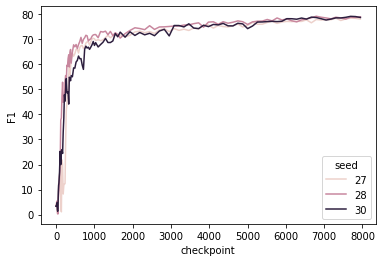

In [40]:
sns.lineplot(data=mrqa_df, x='checkpoint', y='F1', hue='seed')

In [41]:
mrqa_df = mrqa_df[['checkpoint', 'seed', 'F1']]
mrqa_df['model'] = 'MRQA'
mrqa_df.head()

,checkpoint,seed,F1,model
0,1,27,3.809279,MRQA
1,1,28,3.366136,MRQA
2,1,30,3.377537,MRQA
3,2,27,3.809279,MRQA
4,2,28,3.369081,MRQA


In [42]:
mrqa_df.shape

(360, 4)

## Plot

In [43]:
all_models_df = pd.concat(
    [df[['checkpoint', 'seed', 'F1', 'model']] for df in [squadv1_df, squadv2_df, squadv1_adqa_df, mrqa_df, adqa_df]]
)
print(all_models_df.shape)
all_models_df.head()

(1689, 4)


,checkpoint,seed,F1,model
0,1,28,4.923171,SQuADv1
1,2,28,5.037814,SQuADv1
2,3,28,5.204460,SQuADv1
3,4,28,5.195848,SQuADv1
4,5,28,5.204460,SQuADv1


In [44]:
all_models_df['num_examples'] = all_models_df['checkpoint'] * BATCH_SIZE

In [45]:
all_models_df.groupby('model').count()

,checkpoint,seed,F1,num_examples
model,,,,
AdQA,249,249,249,249
MRQA,360,360,360,360
SQuADv1,360,360,360,360
SQuADv1-AdQA,360,360,360,360
SQuADv2,360,360,360,360


In [46]:
all_models_df['model'].unique()

array(['SQuADv1', 'SQuADv2', 'SQuADv1-AdQA', 'MRQA', 'AdQA'], dtype=object)

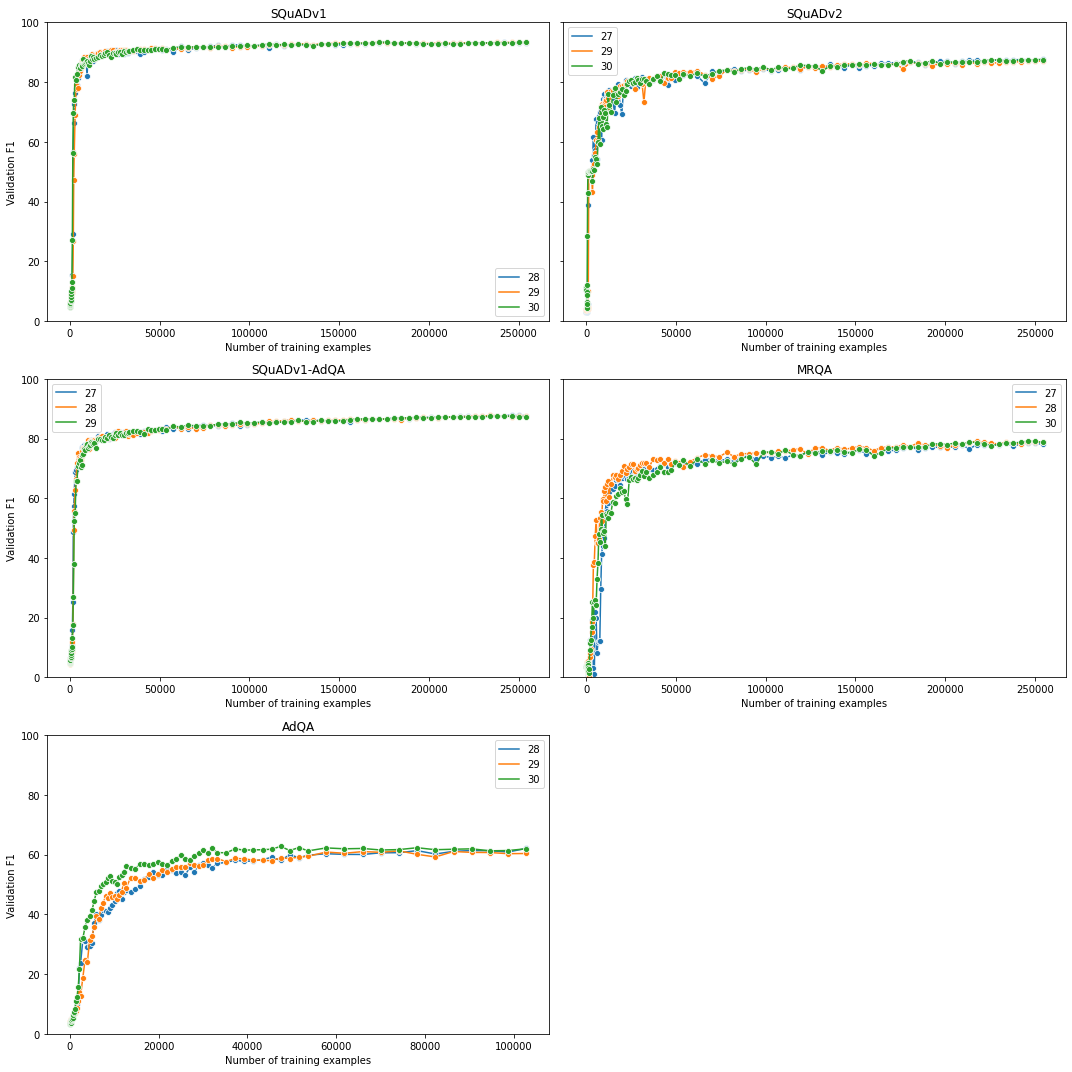

In [48]:
fig, axs = plt.subplots(3, 2, sharey=True, figsize=(15, 15))

idx_x, idx_y = 0, 0

for i, model in enumerate(all_models_df['model'].unique()):
    
    plot_df = all_models_df.copy()[all_models_df['model'] == model]
    
    axs[idx_x, idx_y].set_ylim(0, 100)

    sns.lineplot(x='num_examples', y='F1', hue='seed', data=plot_df, ax=axs[idx_x, idx_y], palette='tab10', marker='o')
    
    axs[idx_x, idx_y].set_title(f'{model}')
    axs[idx_x, idx_y].set_xlabel('Number of training examples')
    axs[idx_x, idx_y].set_ylabel('Validation F1')
    axs[idx_x, idx_y].legend()

    if i % 2 == 0:
        idx_y += 1
    else:
        idx_y -= 1
        idx_x += 1

axs[idx_x, idx_y].axis('off')
plt.tight_layout()
plt.savefig('reports/figures/all_model_learning_curves.pdf')
plt.show()